In [1]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.stream import Stream
from pelenet.network import ReservoirNetwork

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import os
from time import time

In [2]:
# Initilizes the experiment and utils
utils = Utils.instance()
exp = Stream()

In [3]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

1.665

In [4]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:39873
INFO:DRV:      Host server up..............Done 0.04s
INFO:DRV:      Encoding axons/synapses.....Done 14.87s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1586861677.6436474
Include dir is : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/05-reward/v0.x/pelenet/snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1586861677.6436474/initnetwork_0_0.c
gcc -Wall -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/05-reward/v0.x/pelenet/snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -st

INFO:DRV:      Compiling Embedded snips....Done 0.50s
INFO:DRV:      Encoding probes.............Done 3.87ms
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1586861677.6436474/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1586861677.6436474/launcher_chip1_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.21s
INFO:DRV:      Configuring registers.......Done 16.50s
INFO:DRV:      Transferring spikes.........Done 6.30ms
INFO:DRV:      Transferring probes.........Done 0.04s
INFO:HST:  chip=0 cpu=0 Transfered values 20, 2035, 30 
INFO:HST:  chip=1 cpu=0 Transfered values 20, 2035, 30 
INFO:HST:  chip=0 cpu=0 Reset current/v

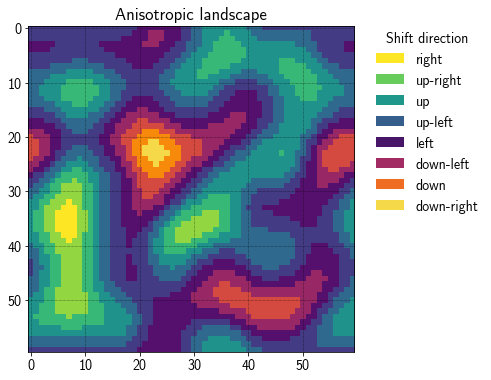

In [5]:
exp.net.plot.landscape()

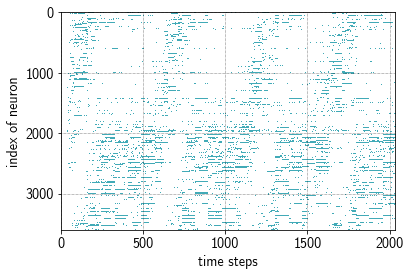

In [6]:
exp.net.plot.reservoirSpikeTrain()

In [7]:
sl = exp.net.exSpikeTrains[:,exp.p.resetOffset+exp.p.inputOffset:]  # spikes from loihi
sl.shape

(3600, 2000)

In [8]:
binSize = 50  #25
binl = np.array([np.mean(sl[:,i:i+binSize], axis=1) for i in range(0,sl.shape[1],binSize)])
binl = np.array([binl[:,i:i+60] for i in range(0,3600,60)])
binl = np.moveaxis(binl,1,0)
binl.shape

(40, 60, 60)

In [21]:
exp.net.plot.plotDir

'/home/seq/05-reward/v0.x/datalog/2020-04-14_12-51-53/plots/'

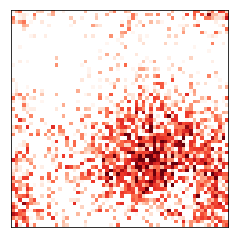

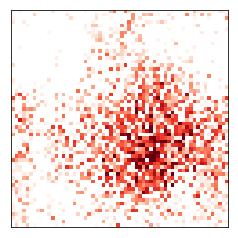

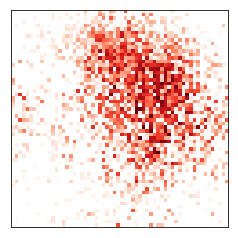

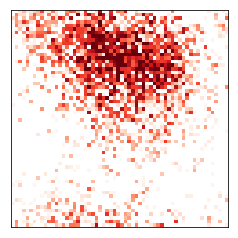

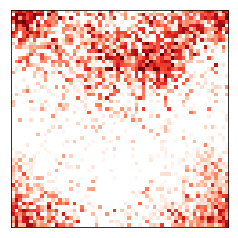

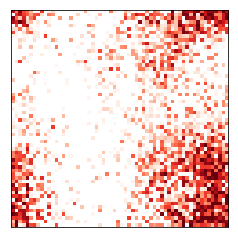

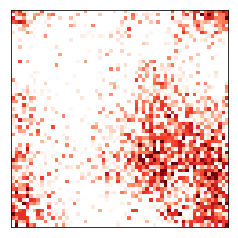

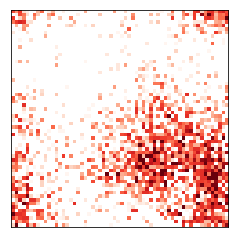

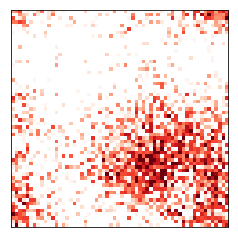

In [23]:
binl[binl == 0.0] = np.nan
#fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(12,12))
#fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(6,6))
#fig.tight_layout()

t = 20
#t = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        fig, ax = plt.subplots()
        #ax = axs[i,j]
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.grid(False)
        #ax.text(2, 8, str(t), bbox=dict(facecolor='#607D8B', alpha=0.7))
        #ax.set_title('t = '+str(t))
        ax.imshow(binl[t,:,:], cmap=plt.get_cmap('Reds'))
        plt.savefig(exp.net.plot.plotDir+'streams/stream_'+str(t)+'.svg')
        plt.show()
        t += 1

#plt.savefig('data/stream/streams.svg')